In [98]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from matplotlib import pyplot as plt
from matplotlib import colors as mcolors
from sklearn.metrics import roc_curve
from scipy import interpolate

In [99]:
os.chdir(r'/home/manhducnmd/pp_dijet/Results_full')


In [100]:
mean_results = np.load('cwola_mean_id10.npy')
std_results = np.load('cwola_std_id10.npy')/3 #Sqrt(Number of samples - 1)


In [101]:
print(mean_results, std_results)

[[0.0007425  0.01555083 0.1381119 ]
 [0.00062054 0.01322167 0.119265  ]
 [0.0013165  0.0177775  0.14375917]
 [0.00083042 0.013725   0.12452352]
 [0.000615   0.013295   0.124765  ]
 [0.001489   0.018895   0.146663  ]
 [0.00159    0.0206425  0.15331667]
 [0.00089607 0.01476    0.13548625]
 [0.00089425 0.01857875 0.15390917]
 [0.00100621 0.01498    0.128465  ]
 [0.00094833 0.01541929 0.13862   ]
 [0.0012675  0.01887167 0.15884   ]
 [0.0012825  0.01881875 0.15156083]
 [0.001328   0.020245   0.16839   ]
 [0.00151917 0.0234125  0.15935167]
 [0.002112   0.025885   0.17420875]
 [0.00134833 0.02478667 0.183115  ]] [[1.67417061e-04 2.50579343e-03 1.00218753e-02]
 [8.96592385e-05 1.42593926e-03 5.97294735e-03]
 [1.90284947e-04 1.23749551e-03 5.32850830e-03]
 [8.85280218e-05 1.27778563e-03 7.74581882e-03]
 [7.22841615e-05 1.08049500e-03 7.39744719e-03]
 [3.78063634e-04 2.49541190e-03 9.93120112e-03]
 [4.37340447e-04 2.71221017e-03 1.24811628e-02]
 [1.31805070e-04 1.10646585e-03 7.10007569e-03]
 [9

In [102]:
from uncertainties import unumpy
array = unumpy.uarray(mean_results, std_results)
print(array)

[[0.0007424999999999999+/-0.00016741706072626595
  0.015550833333333333+/-0.002505793426131621
  0.13811190476190477+/-0.01002187527995555]
 [0.0006205357142857143+/-8.965923852725931e-05
  0.013221666666666668+/-0.001425939261601902
  0.11926500000000002+/-0.0059729473461600175]
 [0.0013165+/-0.00019028494714798413
  0.017777499999999998+/-0.0012374955106540344
  0.14375916666666666+/-0.005328508299181342]
 [0.0008304166666666666+/-8.852802182443786e-05
  0.013725000000000001+/-0.001277785627995209
  0.12452352272727271+/-0.007745818823923122]
 [0.000615+/-7.22841614740048e-05
  0.013294999999999998+/-0.0010804949997313474
  0.12476500000000001+/-0.007397447194809843]
 [0.001489+/-0.00037806363367971687
  0.018895000000000002+/-0.0024954119009805886
  0.146663+/-0.009931201119032212]
 [0.00159+/-0.0004373404470966145 0.0206425+/-0.0027122101739684144
  0.15331666666666666+/-0.012481162843498433]
 [0.0008960714285714286+/-0.000131805070200703
  0.014759999999999999+/-0.0011064658452327

In [103]:
x = np.array([50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 600, 700, 800, 900, 1000, 1100, 1200])
sig_before = np.sqrt(2*((x+25000)*np.log(x/25000 + 1) - x))
                     
sig_after_1 = unumpy.sqrt(2*((x*array[:,0]+25000*0.001)*unumpy.log(x*array[:, 0]/(25000*0.001) + 1)
                         -x*array[:,0]))
sig_after_2 = unumpy.sqrt(2*((x*array[:,1]+25000*0.01)*unumpy.log(x*array[:, 1]/(25000*0.01) + 1)
                         -x*mean_results[:,1]))
sig_after_3 = unumpy.sqrt(2*((x*array[:,2]+25000*0.01)*unumpy.log(x*array[:, 2]/(25000*0.01) + 1)
                         -x*array[:,2]))


                     
                    
                      
                      

In [104]:
sig_after_1_std = []
sig_after_2_std = []
sig_after_3_std = []
sig_after_1_mean = []
sig_after_2_mean = []
sig_after_3_mean = []
sig_after_1_mean.append(0)
sig_after_2_mean.append(0)
sig_after_3_mean.append(0)
sig_after_1_std.append(0)
sig_after_2_std.append(0)
sig_after_3_std.append(0)

sig_before = np.append(0, sig_before)

for x, y, z in zip(sig_after_1, sig_after_2, sig_after_3):
    sig_after_1_mean.append(x.n)
    sig_after_1_std.append(x.s)
    
    sig_after_2_mean.append(y.n)
    sig_after_2_std.append(y.s)
    
    sig_after_3_mean.append(z.n)
    sig_after_3_std.append(z.s)
    

    
    

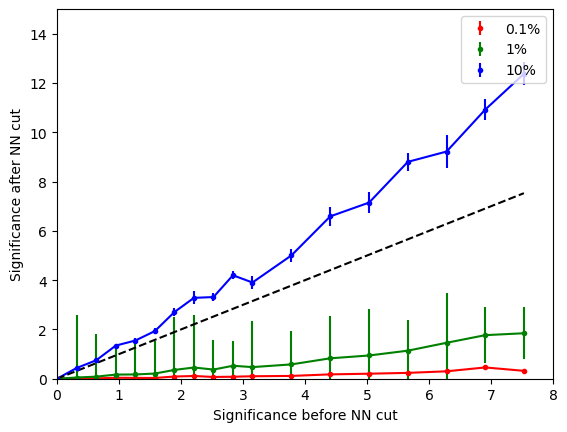

In [105]:
plt.errorbar(sig_before, sig_after_1_mean, yerr = sig_after_1_std, fmt = '.', c='r', label = '0.1%')
plt.plot(sig_before, sig_after_1_mean, c = 'r')
plt.errorbar(sig_before, sig_after_2_mean, yerr = sig_after_2_std, fmt = '.', c = 'g', label = '1%')
plt.plot(sig_before, sig_after_2_mean, c = 'g')
plt.errorbar(sig_before, sig_after_3_mean, yerr = sig_after_3_std, fmt = '.', c = 'b', label = '10%')
plt.plot(sig_before, sig_after_3_mean, c = 'b')
plt.plot(sig_before, sig_before, ls = '--', c = 'black')
plt.xlabel('Significance before NN cut')
plt.ylabel('Significance after NN cut')
plt.legend(loc = 'upper right')
plt.xlim(0, 8)
plt.ylim(0, 15)
plt.show()